In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
import pickle

In [5]:
fraud_tr = pd.read_csv('C:/Users/Pooja Panthare/Desktop/Healthcare Claim data/Train-1542865627584.csv')


In [7]:
fraud_tr.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [9]:
fraud_tr.shape

(5410, 2)

Inference: The file Provider Data has 5,410 rows and 2 columns.

In [15]:
bene_tr = pd.read_csv('C:/Users/Pooja Panthare/Desktop/Healthcare Claim data/Train_Beneficiarydata-1542865627584.csv')


In [16]:
bene_tr.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [17]:
bene_tr.shape

(138556, 25)

Inference: The file Beneficiary Data has 1,38,556 rows and 25 columns.

In [27]:
bene_tr.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [21]:
inpatient_tr = pd.read_csv('C:/Users/Pooja Panthare/Desktop/Healthcare Claim data/Train_Inpatientdata-1542865627584.csv')

In [22]:
inpatient_tr.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [23]:
inpatient_tr.shape

(40474, 30)

In [26]:
inpatient_tr.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [19]:
outpatient_tr = pd.read_csv('C:/Users/Pooja Panthare/Desktop/Healthcare Claim data/Train_Outpatientdata-1542865627584.csv')


In [24]:
outpatient_tr.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [25]:
outpatient_tr.shape

(517737, 27)

In [28]:
outpatient_tr.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

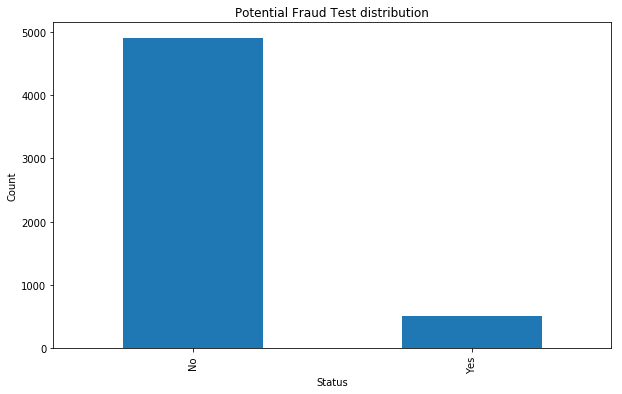

In [29]:
plt.title("Potential Fraud Test distribution")
fraud_tr.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

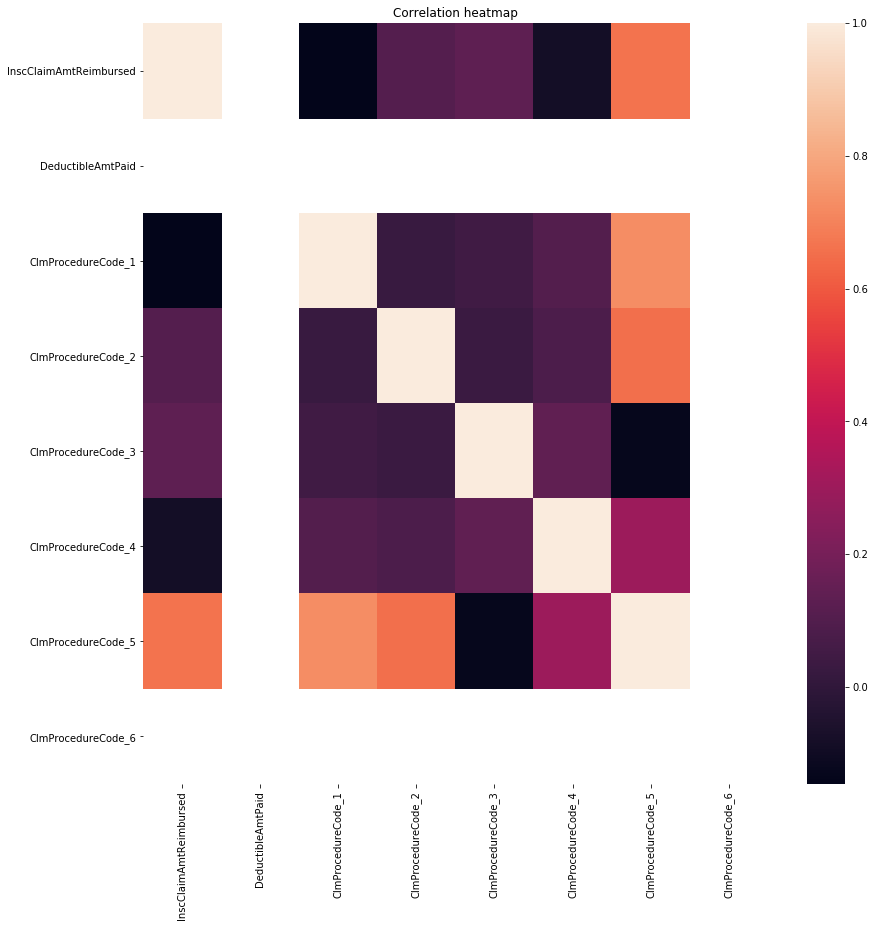

In [30]:
plt.figure(figsize=(14,14))
plt.title('Correlation heatmap')
sns.heatmap(inpatient_tr.corr())
plt.show()

# Task 1

# Intake and Pre-Processing Anomaly Detection


Detects anomalies and discrepancies in the healthcare claims intake / acquisition and pre-processing / data loading steps. Example- Data, technical-level, business-logic validations can be done in the pre-processing step in claims processing; or Alerts/ notifications can be sent out in case of table loading errors and where re-submissions are required.


In [32]:
flag=True
df2=pd.DataFrame()
df2=bene_tr[bene_tr['Gender']>2]
df2=bene_tr[bene_tr['Gender']<1]
if df2.shape[0]!=0:
    print("please correct the discrepencies in gender column",df2)
    flag=False
    
df2=pd.DataFrame()
df2=bene_tr[bene_tr['State']>54]
df2=bene_tr[bene_tr['State']<1]
if df2.shape[0]!=0:
    print("please correct the discrepencies in states column",df2)
    flag=False

df2=pd.DataFrame()
df2=bene_tr[bene_tr['County']>999]
df2=bene_tr[bene_tr['County']<0]
if df2.shape[0]!=0:
    print("please correct the discrepencies in Countries column \n",df2)
    flag=False

df2=pd.DataFrame()
df2=inpatient_tr[inpatient_tr['ClaimID'].duplicated()]
if df2.shape[0]!=0:
    print("please correct the discrepencies in Claimid as multiple people have same Claimid: \n",df2)
    flag=False    

In [33]:
if flag:
    print("No discrepancies found")

No discrepancies found


# TASK 2

# Overpayment Recovery and Adjustment Analysis

In [85]:
overpmnt = pd.DataFrame([bene_tr.BeneID, bene_tr.IPAnnualReimbursementAmt, bene_tr.IPAnnualDeductibleAmt, bene_tr.OPAnnualReimbursementAmt, bene_tr.OPAnnualDeductibleAmt]).transpose()

In [86]:
overpmnt.head()

,BeneID,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,36000,3204,60,70
1,BENE11002,0,0,30,50
2,BENE11003,0,0,90,40
3,BENE11004,0,0,1810,760
4,BENE11005,0,0,1790,1200


In [87]:
overpmnt['Bill'] = overpmnt['IPAnnualReimbursementAmt'] + overpmnt['OPAnnualReimbursementAmt']
overpmnt['Reimbursement'] = overpmnt['IPAnnualDeductibleAmt'] + overpmnt['OPAnnualDeductibleAmt']

In [88]:
overpmnt.head()

,BeneID,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Bill,Reimbursement
0,BENE11001,36000,3204,60,70,36060,3274
1,BENE11002,0,0,30,50,30,50
2,BENE11003,0,0,90,40,90,40
3,BENE11004,0,0,1810,760,1810,760
4,BENE11005,0,0,1790,1200,1790,1200


In [89]:
overpmnt.drop(overpmnt.columns[[1,2,3,4]], axis=1, inplace=True)
overpmnt.head()

,BeneID,Bill,Reimbursement
0,BENE11001,36060,3274
1,BENE11002,30,50
2,BENE11003,90,40
3,BENE11004,1810,760
4,BENE11005,1790,1200


In [90]:
overpmnt['Overpayment'] = np.where(overpmnt['Bill']>overpmnt['Reimbursement'],True,False)

In [91]:
overpmnt.head()

,BeneID,Bill,Reimbursement,Overpayment
0,BENE11001,36060,3274,True
1,BENE11002,30,50,False
2,BENE11003,90,40,True
3,BENE11004,1810,760,True
4,BENE11005,1790,1200,True


# TASK 3

# Merging the Files Inpatient and Outpatient Files using Outer Join, as it uses the union of keys from both frames and sort keys.

Categorizes claims into groups or builds an adjustments or corrections system to be used whenever Overpayment occurs from the side of the payer in the previous claim payment cycle for a physician/hospital.


In [35]:
In_Provider=pd.DataFrame([inpatient_tr['Provider'].value_counts().index,inpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Inpatient_Claim_Number'},axis=1)

In [42]:
In_Provider.head()

,Provider,Inpatient_Claim_Number
0,PRV52019,516
1,PRV55462,386
2,PRV54367,322
3,PRV53706,282
4,PRV55209,275


In [37]:
Out_Provider=pd.DataFrame([outpatient_tr['Provider'].value_counts().index,outpatient_tr['Provider'].value_counts()]).transpose().rename({0:'Provider',1:'Outpatient_Claim_Number'},axis=1)

In [41]:
Out_Provider.head()

,Provider,Outpatient_Claim_Number
0,PRV51459,8240
1,PRV53797,4739
2,PRV51574,4444
3,PRV53918,3588
4,PRV54895,3433


In [39]:
provider_claimnumber=pd.merge(In_Provider,Out_Provider,on='Provider',how='outer')

In [40]:
provider_claimnumber.head()

,Provider,Inpatient_Claim_Number,Outpatient_Claim_Number
0,PRV52019,516,1445
1,PRV55462,386,1521
2,PRV54367,322,314
3,PRV53706,282,191
4,PRV55209,275,487


In [43]:
inreimburse_by_provider=inpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()

In [45]:
inreimburse_by_provider.head()

Provider
PRV51001     97000
PRV51003    573000
PRV51007     19000
PRV51008     25000
PRV51011      5000
Name: InscClaimAmtReimbursed, dtype: int64

In [48]:
inreimburse_temp1=pd.DataFrame([inreimburse_by_provider.index,inreimburse_by_provider])

In [49]:
inreimburse_temp1.head()

,0,1,2,3,4,5,6,7,8,9,...,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091
0,PRV51001,PRV51003,PRV51007,PRV51008,PRV51011,PRV51021,PRV51023,PRV51024,PRV51025,PRV51030,...,PRV57709,PRV57711,PRV57712,PRV57715,PRV57717,PRV57719,PRV57728,PRV57729,PRV57732,PRV57757
1,97000,573000,19000,25000,5000,269000,54000,61000,86000,705600,...,398000,155000,11000,472300,176700,76000,6000,107000,76000,109000


In [50]:
inreimburse_temp2=inreimburse_temp1.transpose()

In [51]:
inreimburse_temp2.head()

,0,1
0,PRV51001,97000
1,PRV51003,573000
2,PRV51007,19000
3,PRV51008,25000
4,PRV51011,5000


In [52]:
In_Provider_Claim=inreimburse_temp2.rename({0:'Provider',1:'Inpatient_Claim_Amount'},axis=1)

In [53]:
In_Provider_Claim.head()

,Provider,Inpatient_Claim_Amount
0,PRV51001,97000
1,PRV51003,573000
2,PRV51007,19000
3,PRV51008,25000
4,PRV51011,5000


In [54]:
outreimburse_by_provider=outpatient_tr.groupby('Provider')['InscClaimAmtReimbursed'].sum()

In [55]:
outreimburse_by_provider

Provider
PRV51001      7640
PRV51003     32670
PRV51004     52170
PRV51005    280910
PRV51007     14710
PRV51008     10630
PRV51011     11630
PRV51012     16890
PRV51013     14880
PRV51014     10480
PRV51015       700
PRV51016       170
PRV51017    142720
PRV51021     79830
PRV51023     11610
PRV51024      3050
PRV51025     32350
PRV51026     19840
PRV51027     29840
PRV51029     30660
PRV51030     34160
PRV51031     30720
PRV51032      5420
PRV51035      3560
PRV51036     74880
PRV51037    128230
PRV51038     35890
PRV51040     11470
PRV51041      7410
PRV51042     48050
             ...  
PRV57730      8720
PRV57731       150
PRV57732     12140
PRV57733     12480
PRV57734     11010
PRV57735       780
PRV57736      2990
PRV57737       130
PRV57738        10
PRV57739      7020
PRV57740      5500
PRV57741      2290
PRV57742       340
PRV57743      4350
PRV57744      8510
PRV57746      6100
PRV57747       110
PRV57748     16000
PRV57751       230
PRV57752        80
PRV57753        80
PRV

In [56]:
outreimburse_temp=pd.DataFrame([outreimburse_by_provider.index,outreimburse_by_provider]).transpose()

In [57]:
Out_Provider_Claim=outreimburse_temp.rename({0:'Provider',1:'Outpatient_Claim_Amount'},axis=1)

In [58]:
provider_claimamount=pd.merge(In_Provider_Claim,Out_Provider_Claim,on='Provider',how='outer')

In [59]:
provider_claimamount

,Provider,Inpatient_Claim_Amount,Outpatient_Claim_Amount
0,PRV51001,97000,7640
1,PRV51003,573000,32670
2,PRV51007,19000,14710
3,PRV51008,25000,10630
4,PRV51011,5000,11630
5,PRV51021,269000,79830
6,PRV51023,54000,11610
7,PRV51024,61000,3050
8,PRV51025,86000,32350
9,PRV51030,705600,34160


In [60]:
provider_list1=pd.merge(fraud_tr,provider_claimnumber,on='Provider',how='outer')

In [61]:
provider_list1

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number
0,PRV51001,No,5,20
1,PRV51003,Yes,62,70
2,PRV51004,No,NaN,149
3,PRV51005,Yes,NaN,1165
4,PRV51007,No,3,69
5,PRV51008,No,2,41
6,PRV51011,No,1,57
7,PRV51012,No,NaN,48
8,PRV51013,No,NaN,46
9,PRV51014,No,NaN,30


In [62]:
provider_list2=pd.merge(provider_list1,provider_claimamount,on='Provider',how='outer')

In [63]:
provider_list2

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number,Inpatient_Claim_Amount,Outpatient_Claim_Amount
0,PRV51001,No,5,20,97000,7640
1,PRV51003,Yes,62,70,573000,32670
2,PRV51004,No,NaN,149,NaN,52170
3,PRV51005,Yes,NaN,1165,NaN,280910
4,PRV51007,No,3,69,19000,14710
5,PRV51008,No,2,41,25000,10630
6,PRV51011,No,1,57,5000,11630
7,PRV51012,No,NaN,48,NaN,16890
8,PRV51013,No,NaN,46,NaN,14880
9,PRV51014,No,NaN,30,NaN,10480


In [64]:
#remove missing value
provider_clean=provider_list2.fillna(0)

In [65]:
provider_clean

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number,Inpatient_Claim_Amount,Outpatient_Claim_Amount
0,PRV51001,No,5,20,97000,7640
1,PRV51003,Yes,62,70,573000,32670
2,PRV51004,No,0,149,0,52170
3,PRV51005,Yes,0,1165,0,280910
4,PRV51007,No,3,69,19000,14710
5,PRV51008,No,2,41,25000,10630
6,PRV51011,No,1,57,5000,11630
7,PRV51012,No,0,48,0,16890
8,PRV51013,No,0,46,0,14880
9,PRV51014,No,0,30,0,10480


In [66]:
y = provider_clean['PotentialFraud'].values
X = provider_clean.drop(['PotentialFraud','Provider'], axis=1).values
warnings. filterwarnings('ignore')

KNN Modeliing on data

In [69]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
param_grid = {'n_neighbors': np.arange(1, 15)}
knn = KNeighborsClassifier()
knn_cv1 = GridSearchCV(knn, param_grid, cv=5)
knn_cv1.fit(X_train1, y_train1)
print('Accuracy : {}%'.format(knn_cv1.best_score_*100))

Accuracy : 93.13440718246633%


In [96]:
filename = open('knn_cv1.pkl','wb')
pickle.dump(knn_cv1,filename)

# TASK 4

# Categorization Based on Provider Payment Preferences-

Based on provider payment preferences, build an AIML-driven analytics model that groups claims the Checks and Electronic Fund Transfer (EFT). Based on provider preferences, analytics and decision , support could further be applied on rolling out tailored suggestions and services to providers – to improve provider engagement, experience, and retention!

In [74]:
provider_clean['Mode_of_Payment'] = np.where(provider_clean['Inpatient_Claim_Number']<30,'Check','EFT')

In [75]:
provider_clean

,Provider,PotentialFraud,Inpatient_Claim_Number,Outpatient_Claim_Number,Inpatient_Claim_Amount,Outpatient_Claim_Amount,Mode_of_Payment
0,PRV51001,No,5,20,97000,7640,Check
1,PRV51003,Yes,62,70,573000,32670,EFT
2,PRV51004,No,0,149,0,52170,Check
3,PRV51005,Yes,0,1165,0,280910,Check
4,PRV51007,No,3,69,19000,14710,Check
5,PRV51008,No,2,41,25000,10630,Check
6,PRV51011,No,1,57,5000,11630,Check
7,PRV51012,No,0,48,0,16890,Check
8,PRV51013,No,0,46,0,14880,Check
9,PRV51014,No,0,30,0,10480,Check


In [76]:
y = provider_clean['Mode_of_Payment'].values
X = provider_clean.drop(['PotentialFraud','Provider','Mode_of_Payment'], axis=1).values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
param_grid = {'n_neighbors': np.arange(1, 15)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print('Accuracy : {}%'.format(knn_cv.best_score_*100))

Accuracy : 99.23422233958277%
